 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv)
whale_returns.set_index(pd.to_datetime(whale_returns["Date"],infer_datetime_format = True),inplace = True)
whale_returns.drop(columns = ["Date"], inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace = True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv)
algo_returns.set_index(pd.to_datetime(algo_returns["Date"], infer_datetime_format = True),inplace = True)
algo_returns.drop(columns = ["Date"], inplace = True)
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv)
sp500_history.set_index(pd.to_datetime(sp500_history["Date"], infer_datetime_format = True), inplace = True)
sp500_history.drop(columns = ["Date"], inplace = True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
#sp500_history["Close"] = sp500_history["Close"].astype(float)
sp500_history["Close"] = sp500_history["Close"].str.replace("$"," ")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
daily_returns = (sp500_history - sp500_history.shift(1)) / sp500_history.shift(1)
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
daily_returns.dropna(inplace = True)
daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
daily_returns.rename(columns = {"Close":"S&P_500"},inplace = True)
daily_returns.head()

,S&P_500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
joined_data = pd.concat([whale_returns,algo_returns, daily_returns], axis = "columns", join = "inner" )
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

## Performance Answers
1. From the chart below, it appears that all the portfolios outperformed the S&P 500

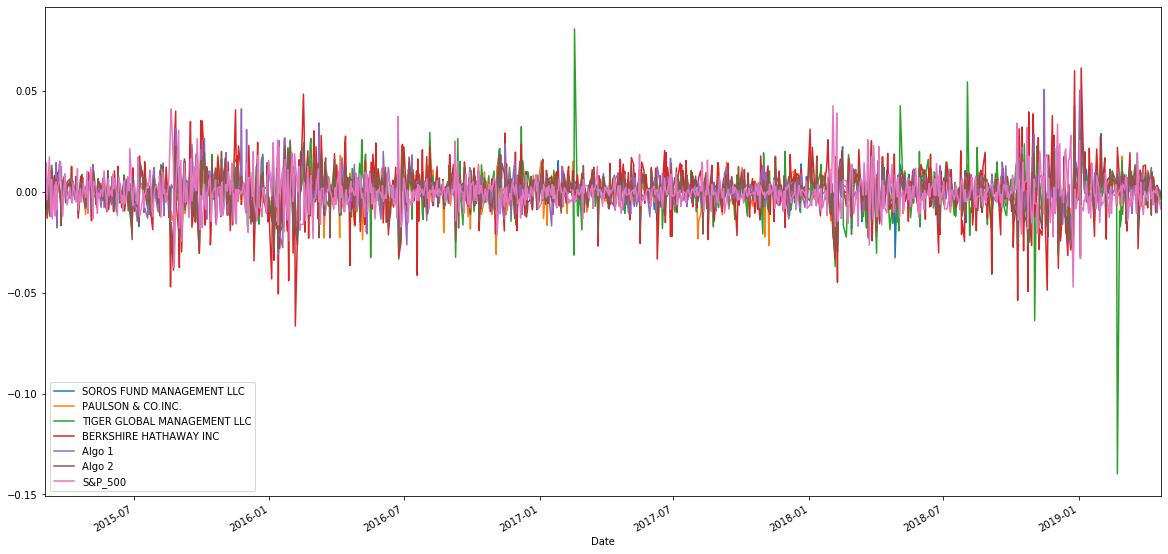

In [15]:
# Plot daily returns
joined_data.plot(figsize=(20,10))

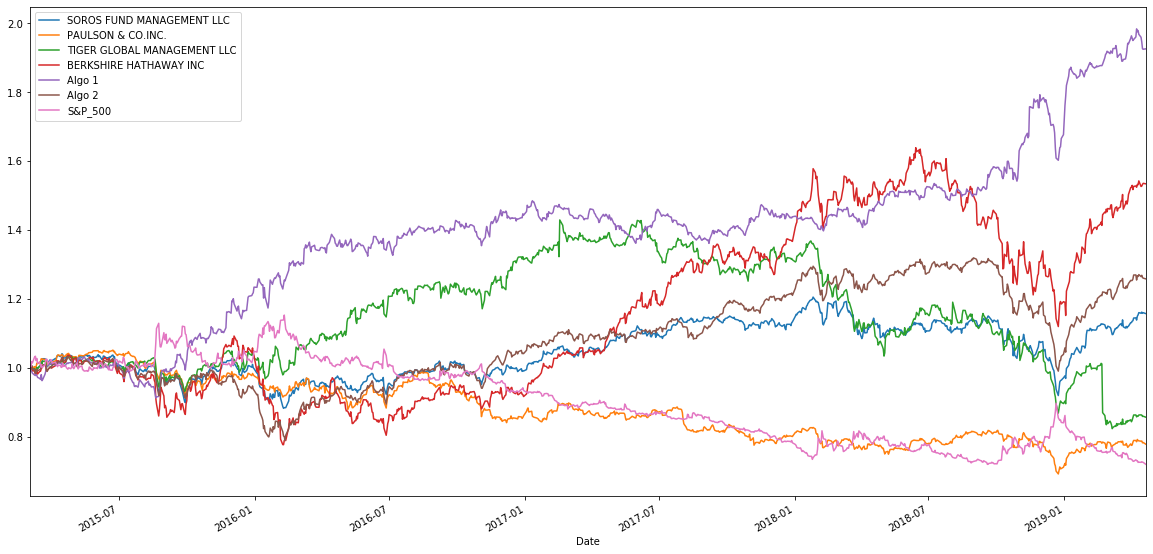

In [16]:
# Plot cumulative returns
cumulative_returns = (1 + joined_data).cumprod()
cumulative_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

## Risk Answers
1. Berkshire Hathaway has the largest spread (variance) and Algo 1 has the smallest
2. Tiger Global Management and Berkshire Hathaway's portfolios are both riskier than the S&P 500

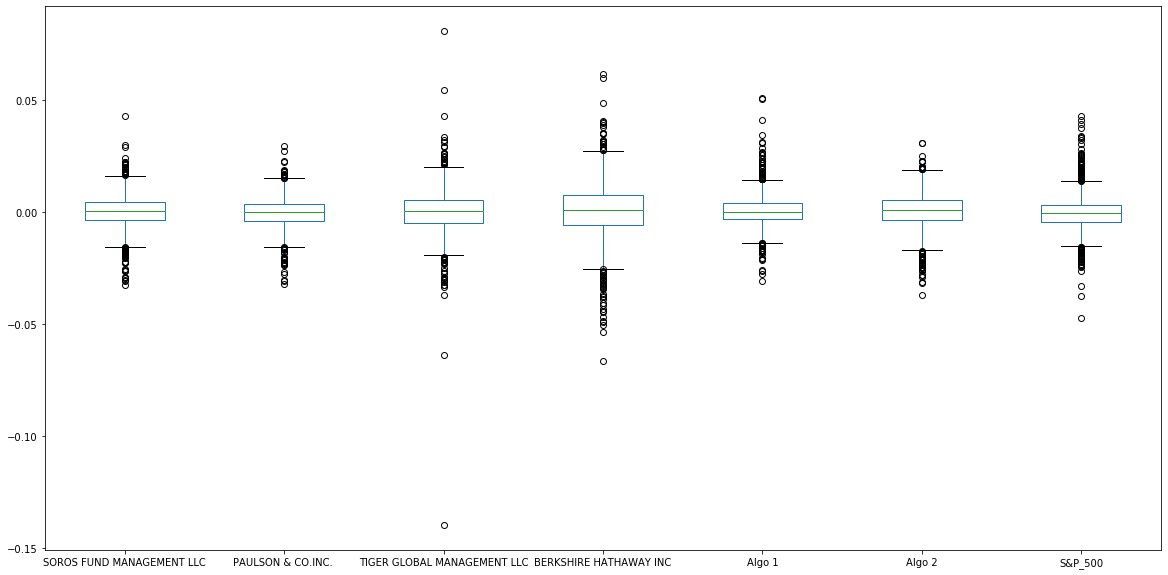

In [17]:
# Box plot to visually show risk
#joined_data.boxplot(by = "Date", column = ["Algo 1","Algo 2"], grid = False)
joined_data.plot.box(figsize = (20,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = joined_data.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P_500                        0.008587
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
for stand_dev in daily_std:
    if stand_dev > daily_std["S&P_500"]:
        print("True")
    else:
#        print(f"{round(stand_dev,6)} False")
        print("False")

False
False
True
True
False
False
False


In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P_500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

## Rolling Statistics Answers
1. The chart is very busy, but yes, it appears that risk increases at the same time that it does for the S&P 500
2. Paulson and Co Inc most closely mimics the S&P 500
3. I selected Berkshire Hathaway.  Yes, it seems sensitive to S&P 500 movements

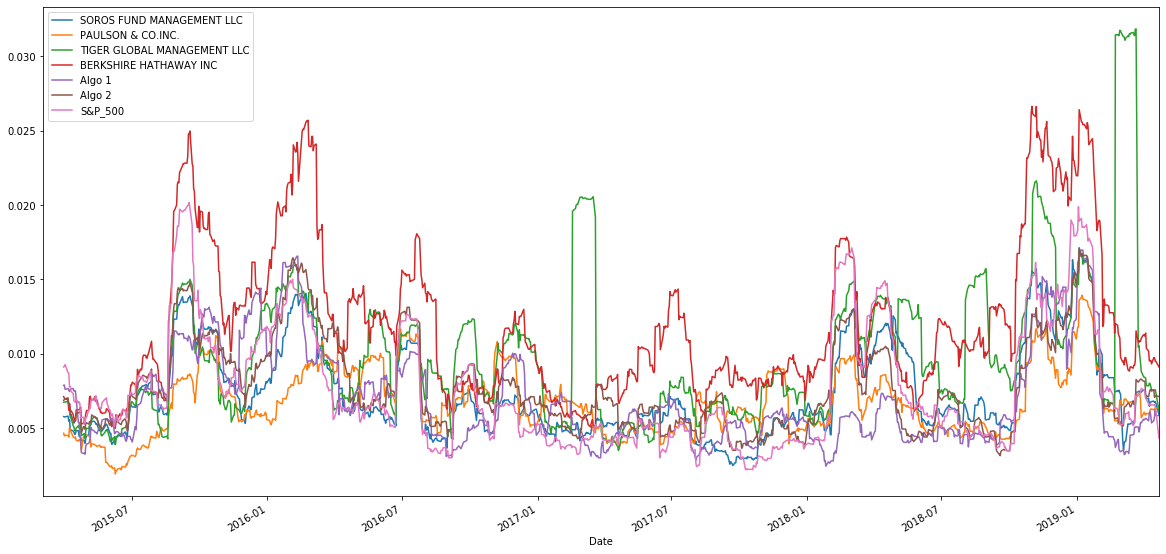

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
joined_data.rolling(window = 21).std().plot(figsize = (20,10))

In [22]:
# Correlation
correlation = joined_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P_500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


variance: 7.37346755284044e-05 | BHI covariance: -1.537109132471749e-06 | BHI beta: -0.02084648940890256


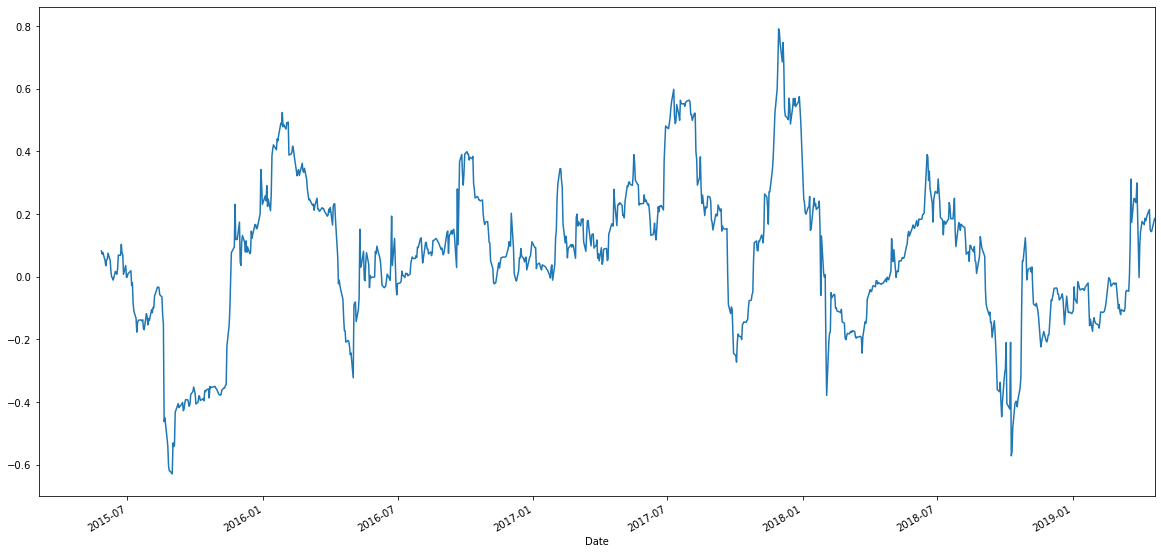

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
variance = joined_data["S&P_500"].var()
BHI_covariance = joined_data["BERKSHIRE HATHAWAY INC"].cov(joined_data["S&P_500"])
BHI_beta = BHI_covariance / variance
# # BHI_beta
print(f"variance: {variance} | BHI covariance: {BHI_covariance} | BHI beta: {BHI_beta}")
# BHI_beta.plot(figsize = (20,10))
rolling_variance = joined_data["S&P_500"].rolling(window = 60).var()
rolling_BHI_covariance = joined_data["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(joined_data["S&P_500"])
rolling_BHI_beta = rolling_BHI_covariance / rolling_variance
rolling_BHI_beta.plot(figsize = (20,10))

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

## Sharpe Ratios Answers
1. see below
2. Yes, the Algo strategies outperform the S&P 500 and the whales portfolios.  The Algo 1 portfolio outperformed all other portfolios in Sharpe Ratio

In [25]:
# Annualzied Sharpe Ratios
sharpe_ratios = (joined_data.mean()*252)/ (joined_data.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P_500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

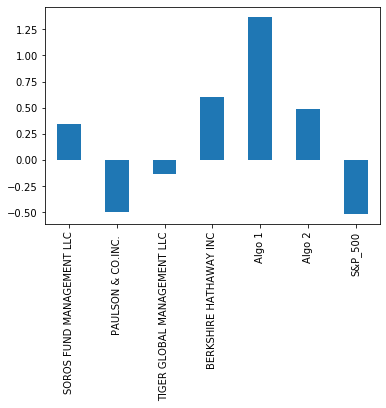

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
AMD_csv = Path("../Resources/AMD_historical.csv")
AMD_returns = pd.read_csv(AMD_csv)
AMD_returns.set_index(pd.to_datetime(AMD_returns["Date"],infer_datetime_format = True),inplace = True)
AMD_returns.drop(columns = ["Date"], inplace = True)
AMD_returns.rename(columns = {" Close/Last": "AMD"}, inplace = True)
# AMD_returns = AMD_returns[1:]
AMD_returns["AMD"] = AMD_returns["AMD"].str.replace("$"," ")
AMD_returns["AMD"] = AMD_returns["AMD"].astype(float)
AMD_returns.head()

,AMD
Date,
2020-01-13,48.75
2020-01-10,48.17
2020-01-09,48.97
2020-01-08,47.83
2020-01-07,48.25


In [28]:
# Read the second stock
INTC_csv = Path("../Resources/INTC_historical.csv")
INTC_returns = pd.read_csv(INTC_csv)
INTC_returns.set_index(pd.to_datetime(INTC_returns["Date"],infer_datetime_format = True),inplace = True)
INTC_returns.drop(columns = ["Date"], inplace = True)
INTC_returns.rename(columns = {" Close/Last": "INTC"}, inplace = True)
INTC_returns["INTC"] = INTC_returns["INTC"].str.replace("$"," ")
INTC_returns["INTC"] = INTC_returns["INTC"].astype(float)
INTC_returns.head()

,INTC
Date,
2020-01-13,59.59
2020-01-10,58.94
2020-01-09,59.30
2020-01-08,58.97
2020-01-07,58.93


In [29]:
# Read the third stock
NVDA_csv = Path("../Resources/NVDA_historical.csv")
NVDA_returns = pd.read_csv(NVDA_csv)
NVDA_returns.set_index(pd.to_datetime(NVDA_returns["Date"],infer_datetime_format = True),inplace = True)
NVDA_returns.drop(columns = ["Date"], inplace = True)
NVDA_returns.rename(columns = {" Close/Last": "NVDA"}, inplace = True)
NVDA_returns["NVDA"] = NVDA_returns["NVDA"].str.replace("$"," ")
NVDA_returns["NVDA"] = NVDA_returns["NVDA"].astype(float)
NVDA_returns.head()

,NVDA
Date,
2020-01-13,251.98
2020-01-10,244.32
2020-01-09,243.02
2020-01-08,240.38
2020-01-07,239.93


In [30]:
# Concatenate all stocks into a single DataFrame
Travis_data = pd.concat([AMD_returns,INTC_returns, NVDA_returns], axis = "columns", join = "inner" )
Travis_data.head()

,AMD,INTC,NVDA
Date,,,
2020-01-13,48.75,59.59,251.98
2020-01-10,48.17,58.94,244.32
2020-01-09,48.97,59.30,243.02
2020-01-08,47.83,58.97,240.38
2020-01-07,48.25,58.93,239.93


In [31]:
# check Nulls
Travis_data.isnull().sum()

AMD     0
INTC    0
NVDA    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Calculate weighted portfolio returns
# initial_investment = 1000
Travis_daily = Travis_data.pct_change()
# weights = [1/3, 1/3, 1/3]
# # Travis_data = Travis_data.astype(float)
# Travis_portfolio_returns = Travis_daily.dot(weights)
# Travis_cumulative_returns = (1 + Travis_portfolio_returns).cumprod()
# # Travis_cumulative_profits = (initial_investment * Travis_cumulative_returns)
# Travis_cumulative_returns
# # Travis_daily
Travis_daily

,AMD,INTC,NVDA
Date,,,
2020-01-13,NaN,NaN,NaN
2020-01-10,-0.011897,-0.010908,-0.030399
2020-01-09,0.016608,0.006108,-0.005321
2020-01-08,-0.023280,-0.005565,-0.010863
2020-01-07,0.008781,-0.000678,-0.001872
...,...,...,...
2019-01-18,0.051113,0.019059,0.054850
2019-01-17,-0.025036,-0.014637,-0.033200
2019-01-16,-0.025679,-0.007015,-0.018982


In [33]:
weights = [1/3, 1/3, 1/3]
# Travis_data = Travis_data.astype(float)
Travis_portfolio_returns = Travis_daily.dot(weights)
# Travis_cumulative_returns = (1 + Travis_portfolio_returns).cumprod()
# Travis_cumulative_profits = (initial_investment * Travis_cumulative_returns)
Travis_portfolio_returns
# Travis_daily

Date
2020-01-13         NaN
2020-01-10   -0.017735
2020-01-09    0.005798
2020-01-08   -0.013236
2020-01-07    0.002077
                ...   
2019-01-18    0.041674
2019-01-17   -0.024291
2019-01-16   -0.017225
2019-01-15    0.016543
2019-01-14   -0.002900
Length: 252, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
joined_data2 = pd.concat([joined_data, Travis_portfolio_returns], axis = "columns", join = "inner" )
joined_data2.rename(columns = { 0 : "Travis"}, inplace = True)
joined_data2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500,Travis
Date,,,,,,,,
2019-01-14,-0.001999,-0.005161,0.007798,-0.001253,-0.005642,-0.006659,-0.010608,-0.002900
2019-01-15,0.006397,0.002851,0.012879,0.021566,0.000369,0.007277,-0.002217,0.016543
2019-01-16,0.004426,0.000646,0.005657,0.004354,-0.001423,0.004469,-0.007534,-0.017225
2019-01-17,0.003667,0.007093,0.006109,0.005210,-0.000851,0.004454,-0.013012,-0.024291
2019-01-18,0.004605,0.005346,0.009285,0.013974,-0.004570,0.010387,0.014361,0.041674
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.015905
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.003558
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000118


In [35]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

## Travis Portfolio Performance
Travis Portfolio was much riskier than the other portfolios whoever did provide higher daily returns during the observed period

In [36]:
# Risk
daily_std2 = joined_data2.std()
annual_std2 = daily_std2 * np.sqrt(252)
annual_std2

SOROS FUND MANAGEMENT LLC      0.106697
PAULSON & CO.INC.              0.099048
TIGER GLOBAL MANAGEMENT LLC    0.296721
BERKSHIRE HATHAWAY INC         0.164407
Algo 1                         0.078243
Algo 2                         0.105919
S&P_500                        0.101589
Travis                         0.372543
dtype: float64

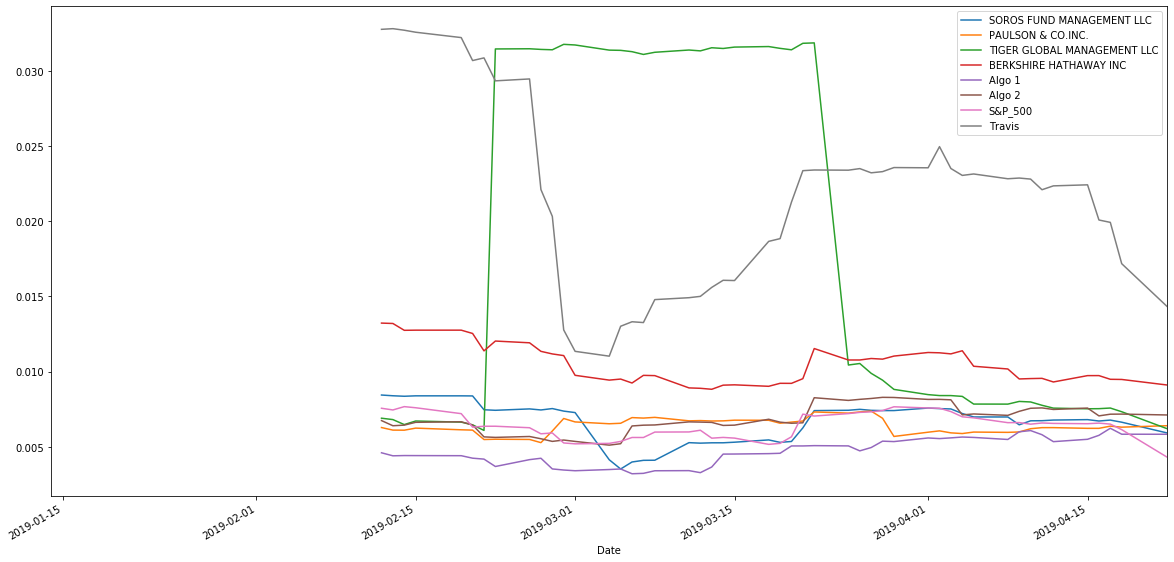

In [37]:
# Rolling
joined_data2.rolling(window = 21).std().plot(figsize = (20,10))

variance: 4.0953458321277535e-05 | Travis covariance: 0.00010511004349965139 | Travis beta: 2.566573076077461


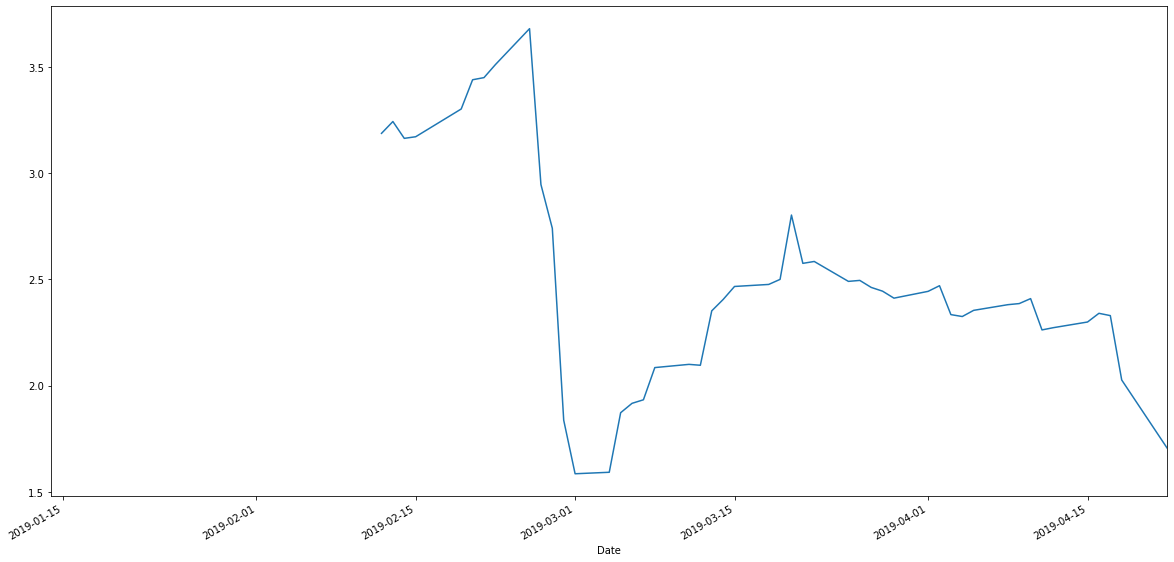

In [38]:
# Beta
variance2 = joined_data2["S&P_500"].var()
Travis_covariance = joined_data2["Travis"].cov(joined_data2["S&P_500"])
Travis_beta = Travis_covariance / variance2
print(f"variance: {variance2} | Travis covariance: {Travis_covariance} | Travis beta: {Travis_beta}")
rolling_variance2 = joined_data2["S&P_500"].rolling(window = 21).var()
rolling_Travis_covariance = joined_data2["Travis"].rolling(window = 21).cov(joined_data2["S&P_500"])
rolling_Travis_beta = rolling_Travis_covariance / rolling_variance2
rolling_Travis_beta.plot(figsize = (20,10))

In [39]:
# Annualzied Sharpe Ratios
sharpe_ratios2 = (joined_data2.mean()*252)/ (joined_data2.std()*np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      3.719940
PAULSON & CO.INC.              1.125153
TIGER GLOBAL MANAGEMENT LLC   -1.120725
BERKSHIRE HATHAWAY INC         4.221006
Algo 1                         1.614950
Algo 2                         3.936301
S&P_500                       -4.595134
Travis                        -2.215745
dtype: float64

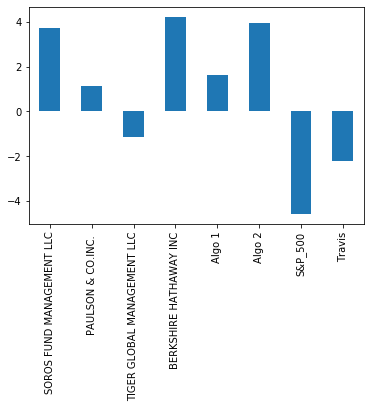

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind = "bar")

## Include correlation analysis to determine which stocks (if any) are correlated

In [41]:
# YOUR CODE HERE
correlation2 = joined_data2.corr()
correlation2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500,Travis
SOROS FUND MANAGEMENT LLC,1.000000,0.681155,0.286901,0.673396,-0.080775,0.747511,0.127049,0.103840
PAULSON & CO.INC.,0.681155,1.000000,0.172807,0.494623,-0.064967,0.647186,-0.022186,0.067291
TIGER GLOBAL MANAGEMENT LLC,0.286901,0.172807,1.000000,-0.012275,-0.089216,0.080785,0.016193,0.078494
BERKSHIRE HATHAWAY INC,0.673396,0.494623,-0.012275,1.000000,0.050531,0.689947,0.118076,0.173193
Algo 1,-0.080775,-0.064967,-0.089216,0.050531,1.000000,-0.088538,-0.107045,-0.190883
Algo 2,0.747511,0.647186,0.080785,0.689947,-0.088538,1.000000,0.025707,0.000998
S&P_500,0.127049,-0.022186,0.016193,0.118076,-0.107045,0.025707,1.000000,0.699878
Travis,0.103840,0.067291,0.078494,0.173193,-0.190883,0.000998,0.699878,1.000000
